# Import Libraries & Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName("HR_Data").master("local").getOrCreate()
spark

In [3]:
df = spark.read.format("csv").option("header", "true").load("employee_review_data.csv")

In [4]:
df.show()

+-----+-------+-----------------+-------------+--------------------+--------------------+--------------------+--------------------+---------------+------------------+--------------------+--------------------------+------------------+----------------------+
|Index|company|         location|        dates|           job-title|             summary|                pros|                cons|overall-ratings|work-balance-stars|culture-values-stars|carrer-opportunities-stars|comp-benefit-stars|senior-mangemnet-stars|
+-----+-------+-----------------+-------------+--------------------+--------------------+--------------------+--------------------+---------------+------------------+--------------------+--------------------------+------------------+----------------------+
|    1| google|             none| Dec 11; 2018|Current Employee ...|Best Company to w...|People are smart ...|Bureaucracy is sl...|              5|                 4|                   5|                         5|               

# EDA

In [5]:
print((df.count(), len(df.columns)))

(67529, 14)


In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.head()

Row(Index='1', company='google', location='none', dates=' Dec 11; 2018', job-title='Current Employee - Anonymous Employee', summary='Best Company to work for', pros='People are smart and friendly', cons='Bureaucracy is slowing things down', overall-ratings='5', work-balance-stars='4', culture-values-stars='5', carrer-opportunities-stars='5', comp-benefit-stars='4', senior-mangemnet-stars='5')

In [8]:
df.groupBy('company').count().orderBy('count',ascending=False).show()

+---------+-----+
|  company|count|
+---------+-----+
|   amazon|26430|
|microsoft|17930|
|    apple|12950|
|   google| 7819|
| facebook| 1590|
|  netflix|  810|
+---------+-----+



# Plots of Company-wise Ratings on various parameters

In [9]:
df3 = df.select('overall-ratings','company','work-balance-stars',
                'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
               'senior-mangemnet-stars',
               )
df3.toPandas().to_csv('review.csv')
df3 = pd.read_csv("review.csv")
df3.drop(columns=['Unnamed: 0'],inplace=True)

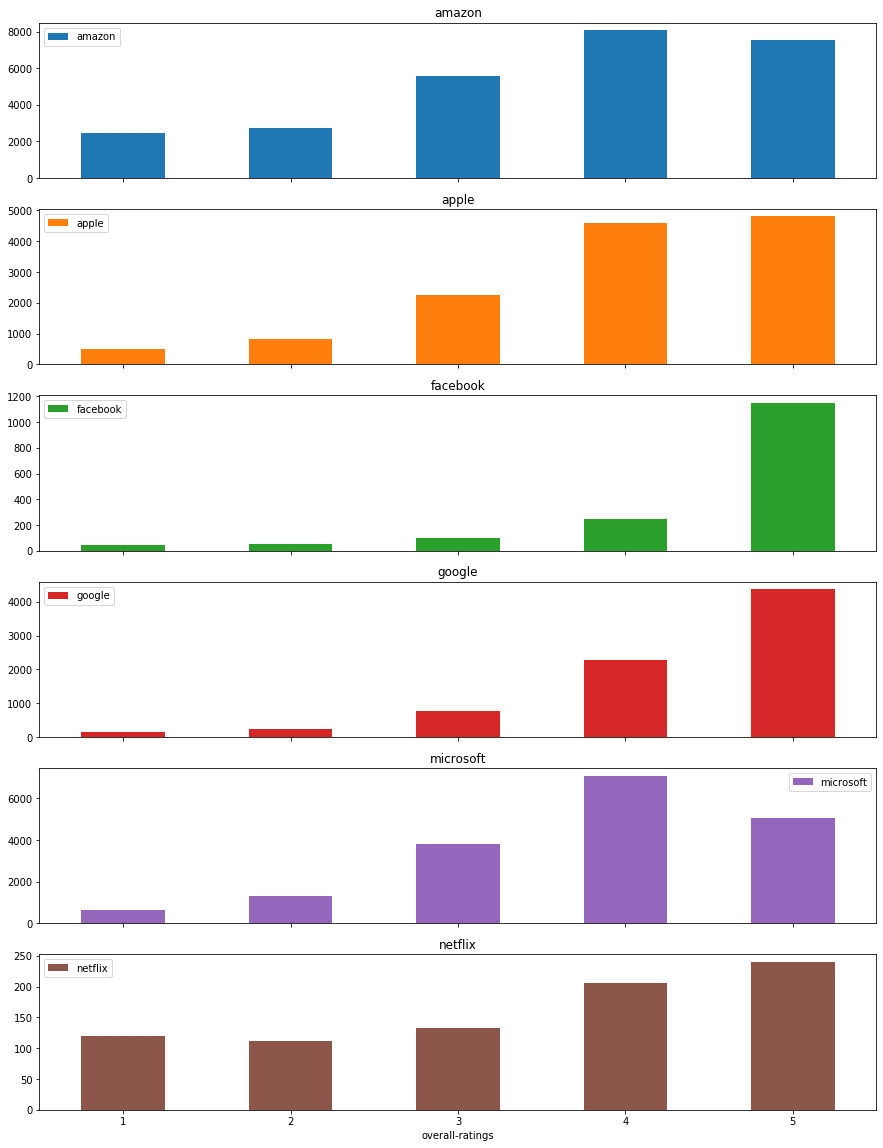

In [10]:
df3.groupby(['overall-ratings','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

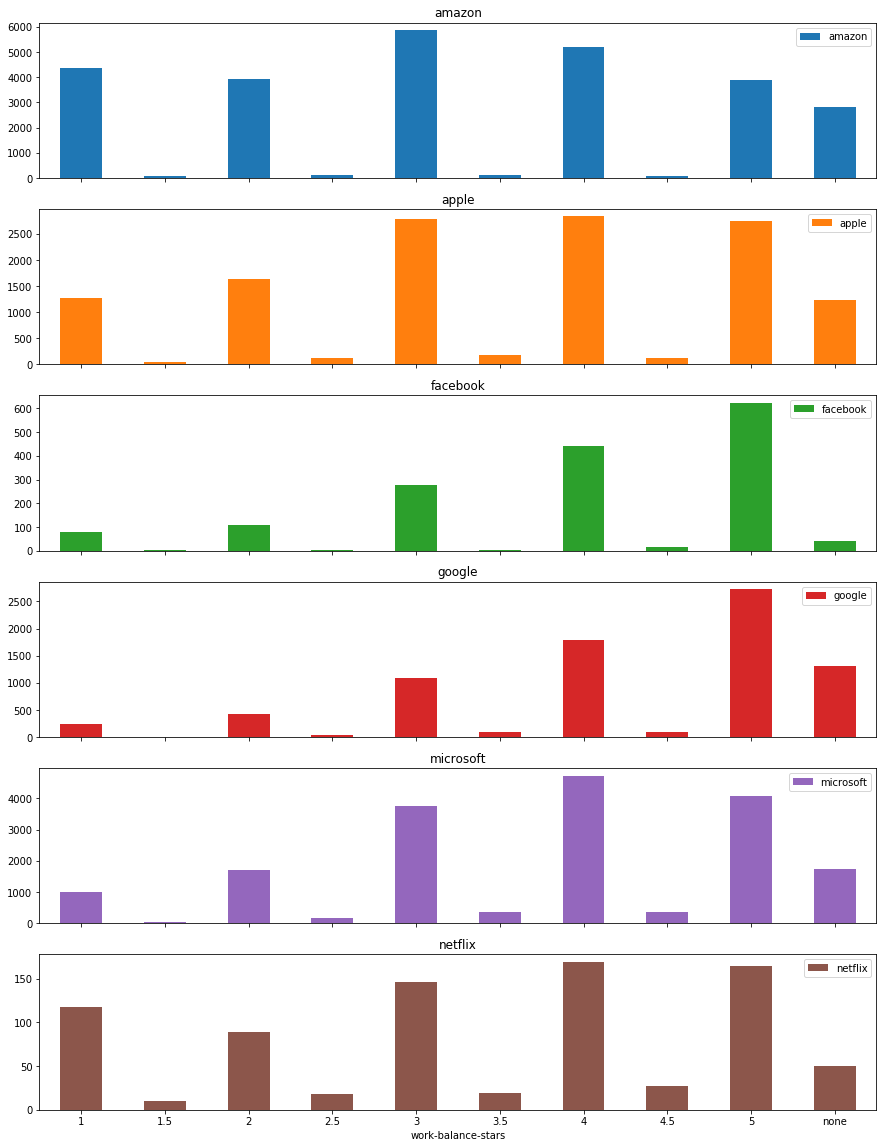

In [11]:
df3.groupby(['work-balance-stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

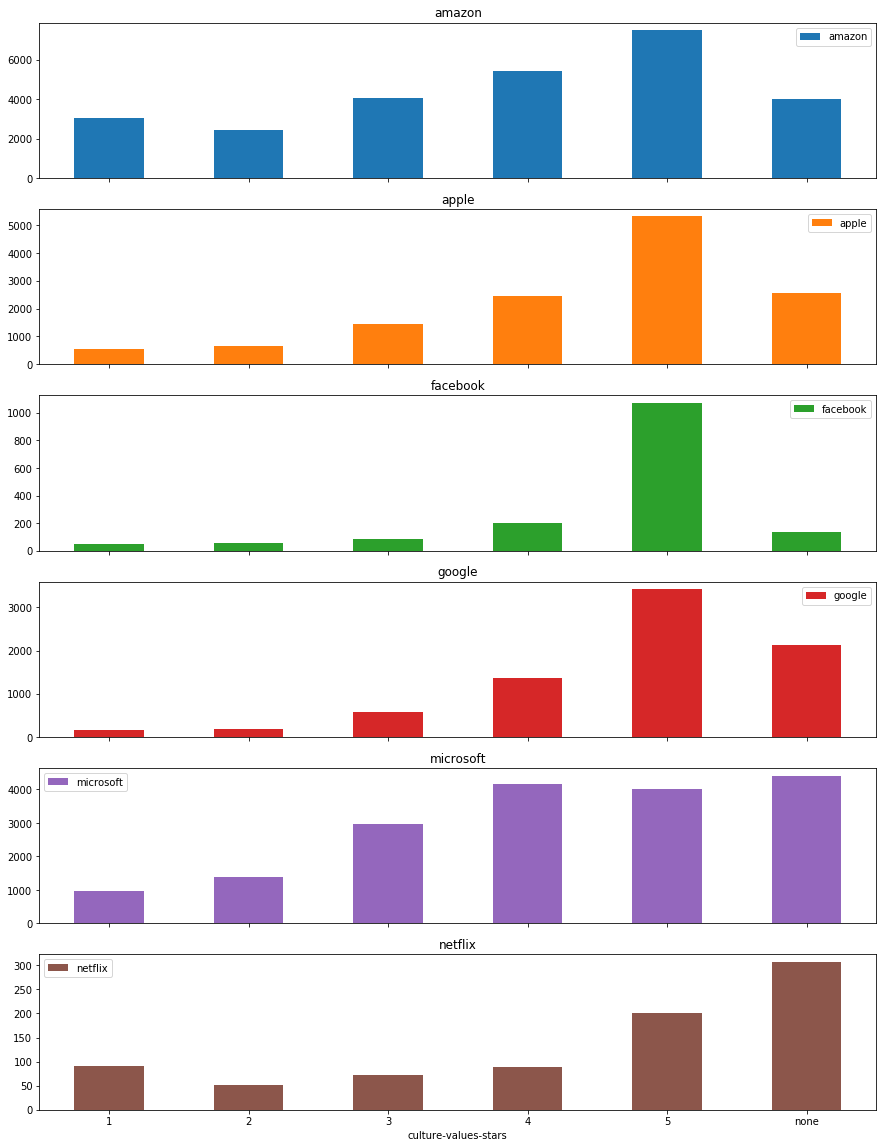

In [12]:
df3.groupby(['culture-values-stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

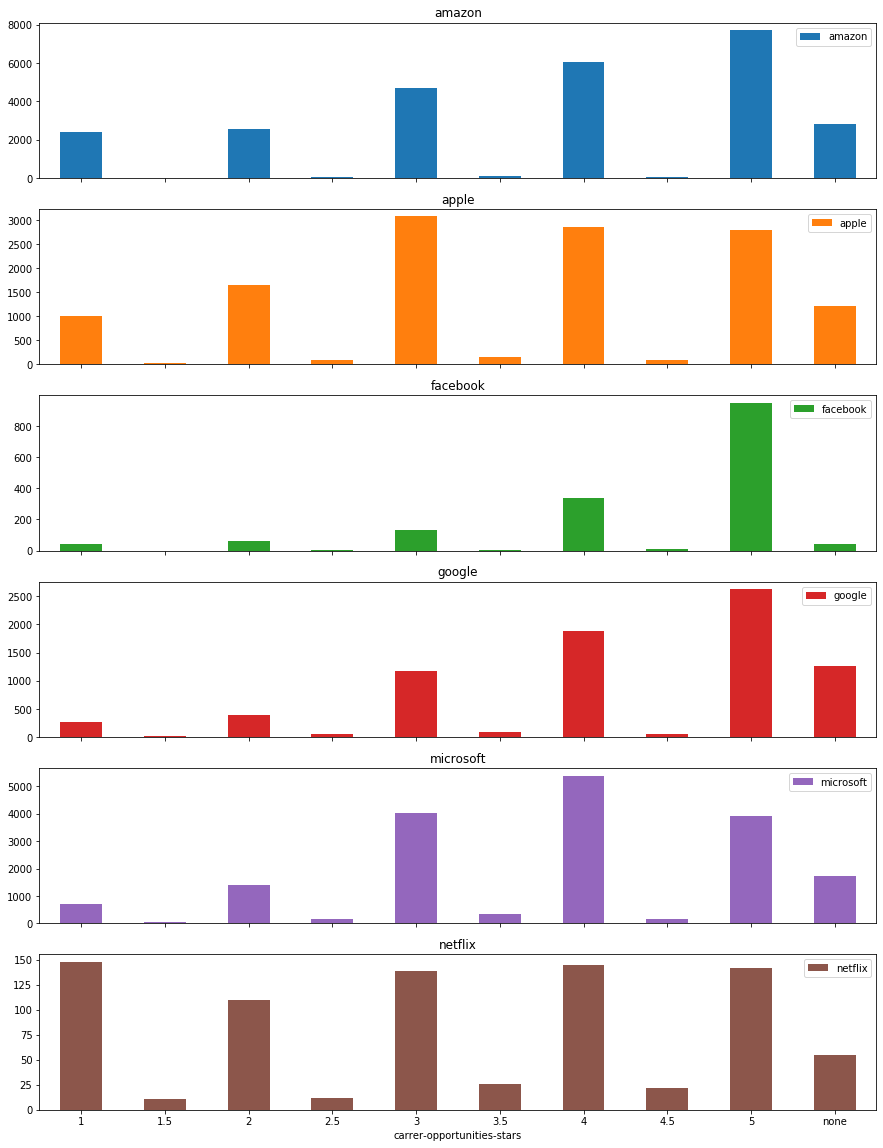

In [13]:
df3.groupby(['carrer-opportunities-stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

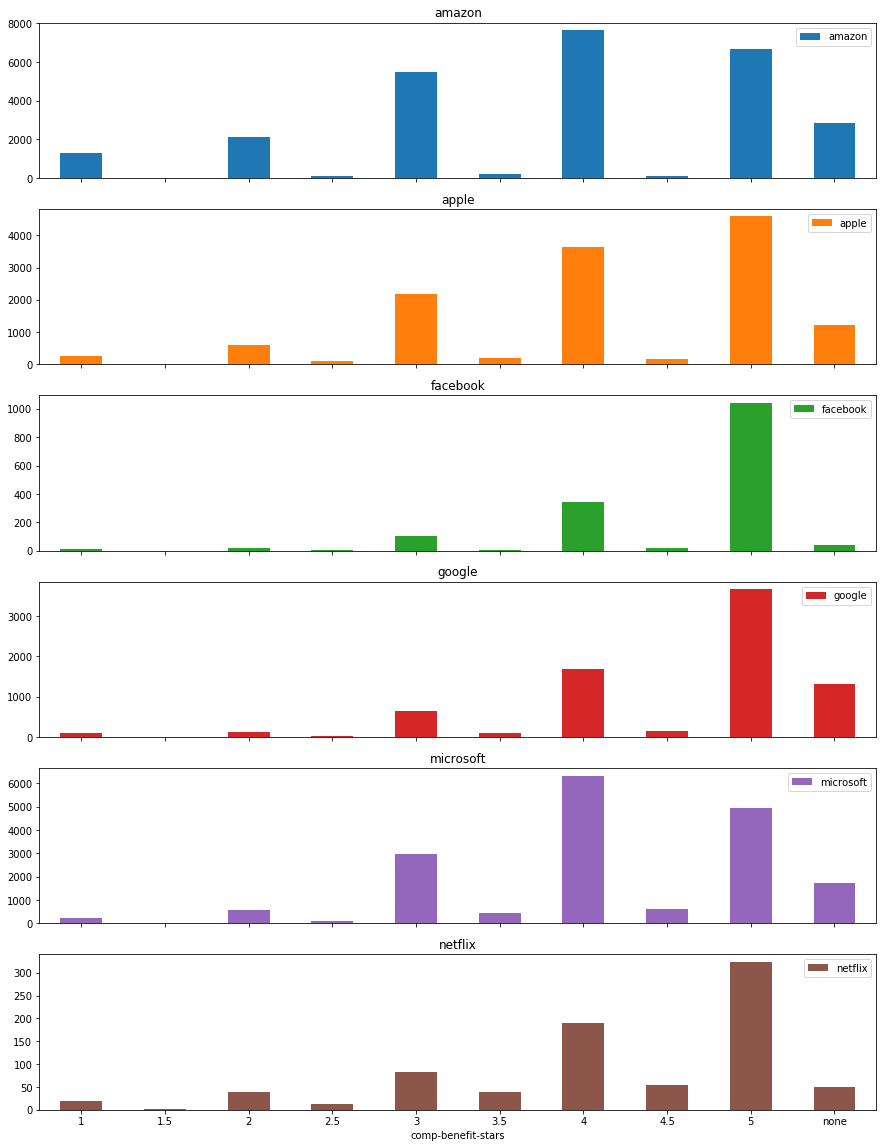

In [14]:
df3.groupby(['comp-benefit-stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

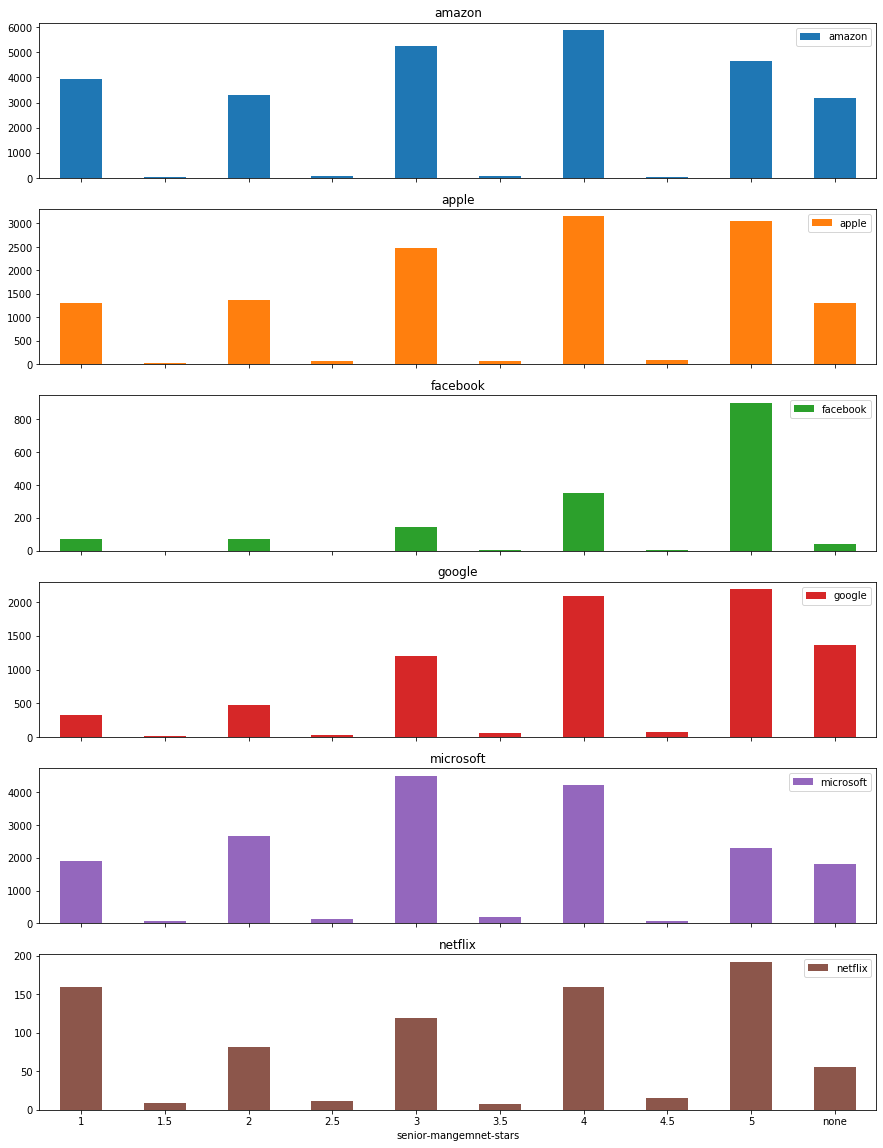

In [15]:
df3.groupby(['senior-mangemnet-stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)
plt.show()

# Heatmaps

In [16]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = df3.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots()
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

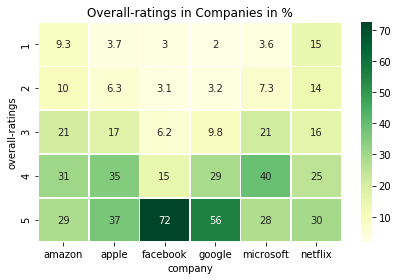

In [17]:
plot_heatmap('overall-ratings','company', 'Overall-ratings in Companies in %' )

## Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are:
### 72% people in FB have rated it 5 and overall 87% people are very happy working in FB. This is followed by Gogle with 85%
### NetFlix has got a 55-45% which means people have neutral say about the company
### 60% people are happy with Amazon
### 72% people are happy with Apple
### 68% people are happy with Microsoft

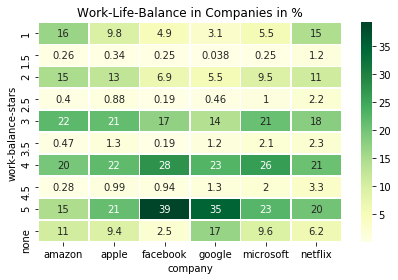

In [18]:
plot_heatmap('work-balance-stars','company', 'Work-Life-Balance in Companies in %' )

## Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance
### 46.2% people in amazon have a W/L balance
### 54% apple 
### 70.5% FB
### 76.3% Google
### 60.6% Microsoft
### 50.5% Netflix

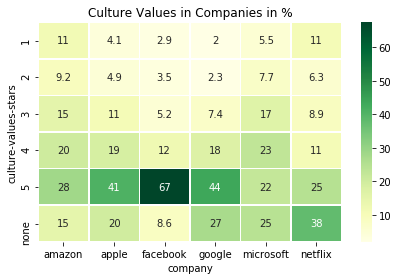

In [19]:
plot_heatmap('culture-values-stars','company', 'Culture Values in Companies in %' )

## In cultural values,
### Facebook leads with 89%
### Amazon 48%
### Apple 60%
### GOogle 62%
### Microsoft 45%
### Netflix 36%

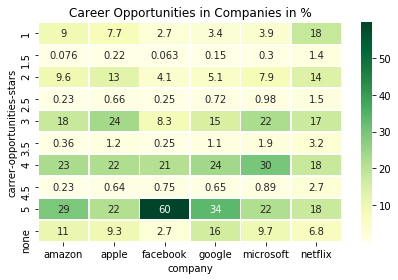

In [20]:
plot_heatmap('carrer-opportunities-stars','company', 'Career Opportunities in Companies in %' )

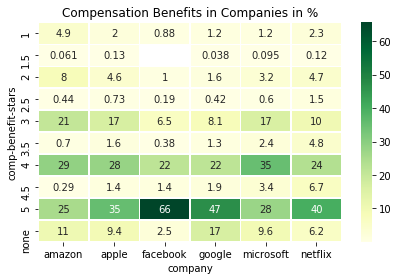

In [21]:
plot_heatmap('comp-benefit-stars','company', 'Compensation Benefits in Companies in %' )

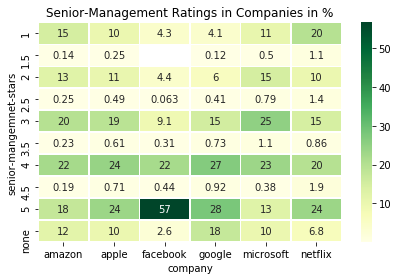

In [22]:
plot_heatmap('senior-mangemnet-stars','company', 'Senior-Management Ratings in Companies in %' )